In [45]:
#importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.polynomial.legendre as leg #for finding the legendre nodes
from tqdm import tqdm
import time

In [2]:
download_dir  = 'C:\\Users\\ABHISHEK\\Downloads\\NMSC_Endsem' #Use flag to conveniently save all the plots

True Value of the integral is 1.493648265624854


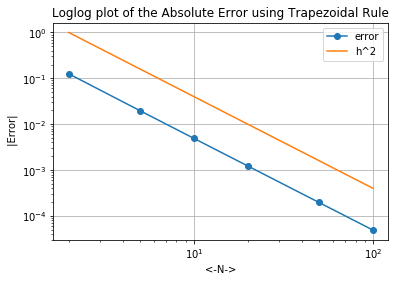

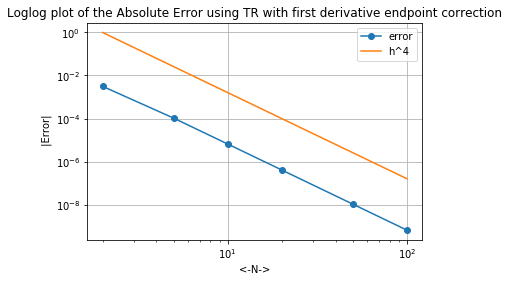

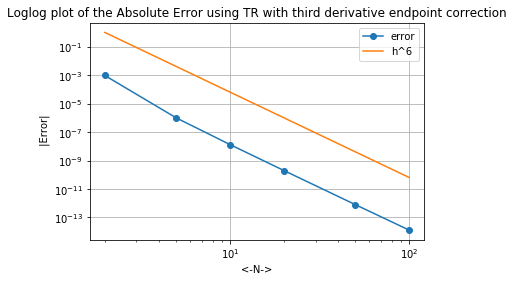

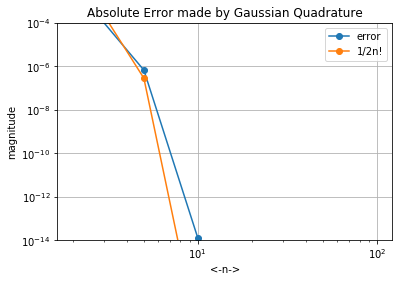

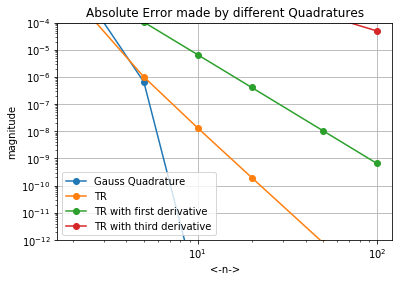

In [62]:
#Question 6:

#Computing integral of e^(x^2) from 0 to 1 using trapezoidal rule and gaussian quadrature

def Gauss_Quad(n): #function to compute the output of Gaussian Quadrature for n
    leg_nodes,w = leg.leggauss(n+1)
    f = np.e**(-leg_nodes**2)
    
    return np.sum(np.multiply(f,w))

def factorial(n): #actual value of the n!
    if (n == 1):
        return 1
    else:
        return n*factorial(n-1)


true_value = 1.49364826562485405080#true value of the integral obtained from wolfram alpha
print(f'True Value of the integral is {true_value}')
N = [2,5,10,20,50,100]
    
#List containing the number of panels

error_TR = []
error_TR_1 = [] #with first derivative endpoint corrections
error_TR_3 = [] #with third derivative endpoint corrections
h_vals = []

error_gauss = [] #error in gaussian quadrature
error_order = [] #order of error for gaussian quadrature

for n in N:
    
    panels = np.linspace(-1,1,n+1)
    x_0 = panels[0] 
    x_N = panels[-1]
    h = 2/(n)
    h_vals.append(h)
    TR = (h/2)*(np.e**(-(x_0**2))+np.e**(-(x_N**2))) #TR
    for i in range(1,len(panels)-1):
        TR += h*(np.e**(-(panels[i]**2)))
        
    TR_1 = TR + ((h**2)/(3*np.e)) #TR with endpoint corrections using first derivative
    TR_3 = TR_1 +  ((h**4)/(90*np.e)) #TR with endpoing corrections using both first and second derivatives
    
    error_TR.append(np.abs(TR-true_value))
    error_TR_1.append(np.abs(TR_1-true_value))
    error_TR_3.append(np.abs(TR_3-true_value))
    
    
    #Gaussian Quadrature
    error_gauss.append(np.abs(Gauss_Quad(n)-true_value))
    error_order.append(1/factorial(2*n))
        
        
#plotting all the errors in a log log plot
plt.loglog(N,error_TR,'o-',label = 'error')
plt.loglog(N,np.asarray(h_vals)**2,label = "h^2")
plt.title("Loglog plot of the Absolute Error using Trapezoidal Rule")
plt.grid(True)
plt.legend()
plt.ylabel(" |Error|")
plt.xlabel("<-N->")
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\TR.png')
plt.show()

plt.loglog(N,error_TR_1,'o-',label = 'error')
plt.loglog(N,np.asarray(h_vals)**4,label = "h^4")
plt.title("Loglog plot of the Absolute Error using TR with first derivative endpoint correction")
plt.grid(True)
plt.legend()
plt.ylabel(" |Error|")
plt.xlabel("<-N->")
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\TR_1.png')
plt.show()

plt.loglog(N,error_TR_3,'o-',label = 'error')
plt.loglog(N,[h**6 for h in h_vals],label = "h^6")
plt.title("Loglog plot of the Absolute Error using TR with third derivative endpoint correction")
plt.grid(True)
plt.legend()
plt.ylabel(" |Error|")
plt.xlabel("<-N->")
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\TR_3.png')
plt.show()        

plt.loglog(N,error_gauss,'o-',label = 'error')
plt.loglog(N,error_order,'o-',label = '1/2n!')
plt.legend(loc = 'best')
plt.grid()
plt.ylabel('magnitude')
plt.ylim(10e-15,10e-5)
plt.xlabel('<-n->')
plt.title('Absolute Error made by Gaussian Quadrature')
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\Gauss_Quad.png')
plt.show()

#All in one plot
plt.loglog(N,error_gauss,'o-',label = 'Gauss Quadrature')
plt.loglog(N,error_TR_3,'o-',label = 'TR')
plt.loglog(N,error_TR_1,'o-',label = 'TR with first derivative')
plt.loglog(N,error_TR,'o-',label = 'TR with third derivative')
plt.legend()
plt.grid()
plt.ylabel('magnitude')
plt.ylim(10e-13,10e-5)
plt.xlabel('<-n->')
plt.title('Absolute Error made by different Quadratures')
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\Quad.png')
plt.show()



100%|██████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 1604.48it/s]


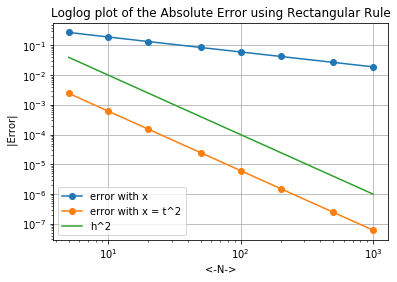

Time taken without substitution = 0.010973215103149414
Time taken with substitution = 0.009992837905883789


In [56]:
#Question 7:
#Rectangular Rule
true_value = np.around(1.493648265624854050798934872263706010708999,20)#true value of the integral obtained from wolfram alpha

N = [5,10,20,50,100,200,500,1000] #number of panels


err_x = [] #error without any variable change
err_t = [] #error with substitution
h_vals = [] #h
for n in tqdm(N):
    x = np.linspace(0,1,n+1) #nodes for n panels
    h = 1/(n) #h
    h_vals.append(h)
    y = (x[:-1]+x[1:])/2 #y_i  
    RR = 0
    RR_t = 0
    for i in range(len(y)):
        RR += h*((math.e**(-y[i]))/math.sqrt(y[i])) #RR without any substitution
        RR_t += 2*h*((math.e**(-y[i]**2)))        #RR with substitution
        
    err_x.append(np.abs(RR-true_value)) 
    err_t.append(np.abs(RR_t - true_value))
    

#plotting all the errors in a log log plot
plt.loglog(N,err_x,'o-',label = 'error with x')
plt.loglog(N,err_t,'o-',label = 'error with x = t^2')
plt.loglog(N,np.asarray(h_vals)**2,label = "h^2")

plt.title("Loglog plot of the Absolute Error using Rectangular Rule")
plt.grid(True)
plt.legend()
plt.ylabel(" |Error|")
plt.xlabel("<-N->")
#plt.tick_params(axis='x', colors='white')
#plt.tick_params(axis='y', colors='white')
plt.savefig(download_dir+'\\Q7.png')
plt.show()       
    
    
#comparing computational time between the two methods
x = np.linspace(0,1,10001) #nodes for 10000 panels
h = 1/(10000) #h
y = (x[:-1]+x[1:])/2 #y_i 

startTime = time.time()
RR = 0
for i in range(len(y)):
    RR += h*((math.e**(-y[i]))/math.sqrt(y[i])) #RR without any substitution
endTime = time.time()
print(f'Time taken without substitution = {endTime - startTime}')

startTime = time.time()
RR_t = 0
for i in range(len(y)):
    RR_t += 2*h*((math.e**(-y[i]**2)))        #RR with substitution
endTime = time.time()
print(f'Time taken with substitution = {endTime - startTime}')    

Derivative 0.01


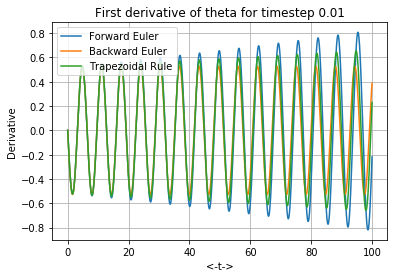

Theta 0.01


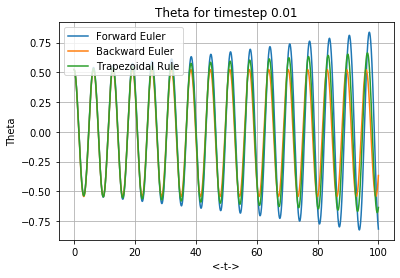

Derivative 0.02


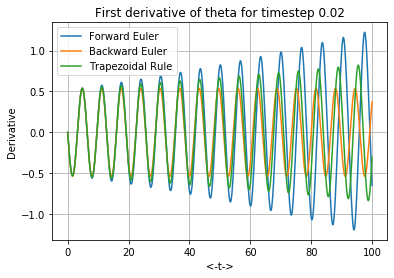

Theta 0.02


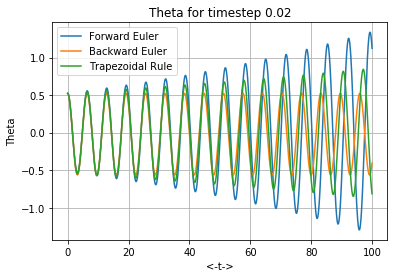

Derivative 0.05


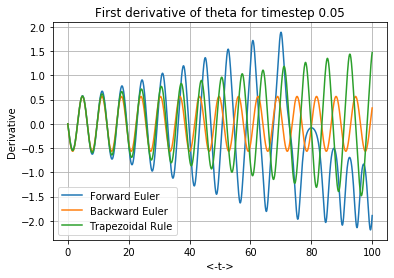

Theta 0.05


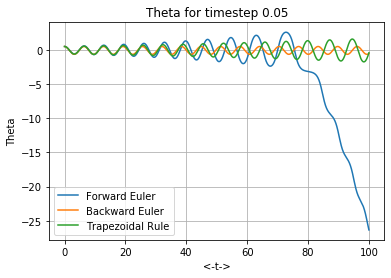

Derivative 0.1


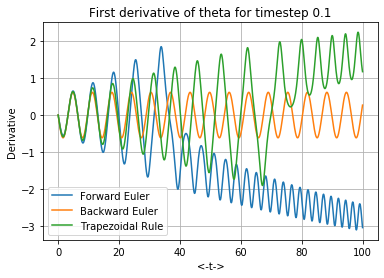

Theta 0.1


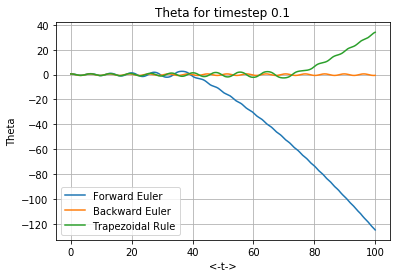

Derivative 0.2


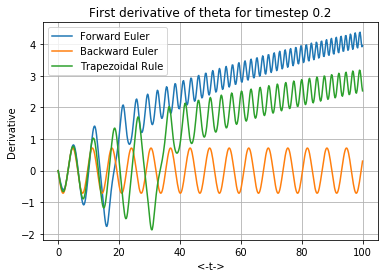

Theta 0.2


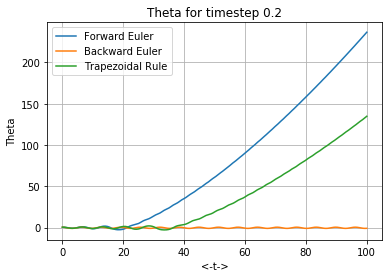

Derivative 0.5


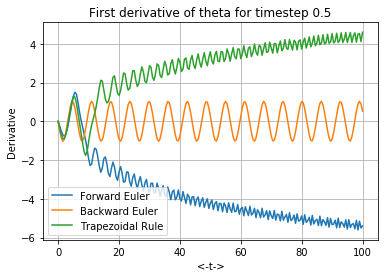

Theta 0.5


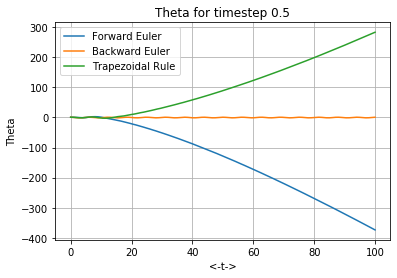

Derivative 1


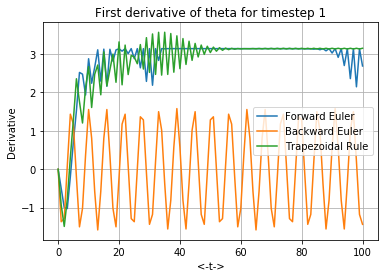

Theta 1


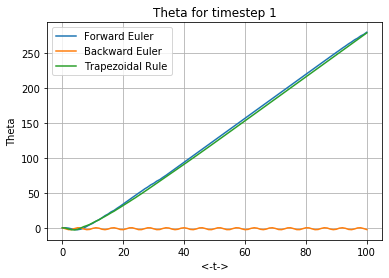

Derivative 2


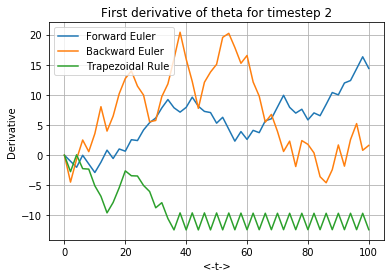

Theta 2


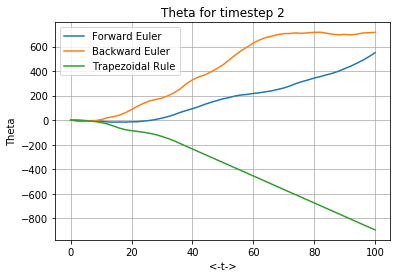

Derivative 5


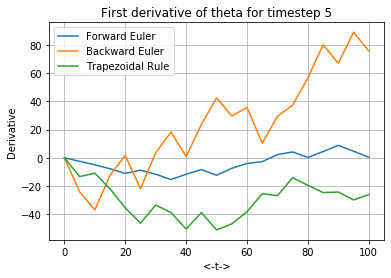

Theta 5


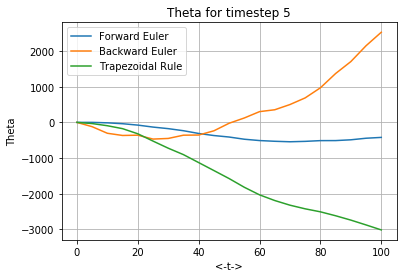

Derivative 10


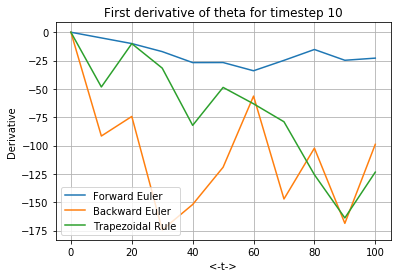

Theta 10


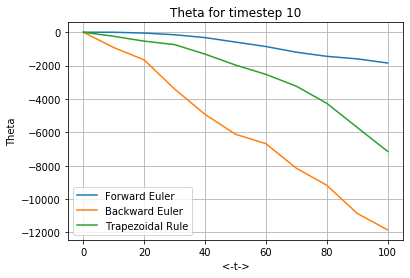

Derivative 20


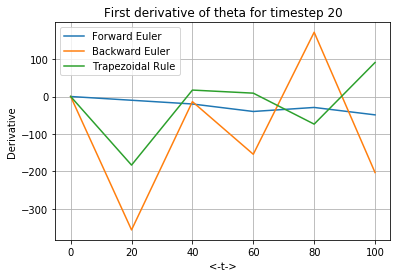

Theta 20


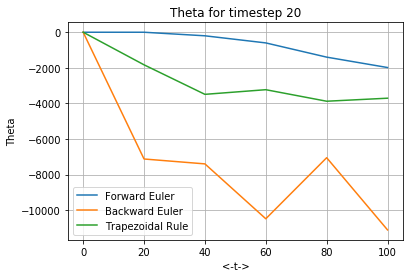

In [63]:
# Question 8:

#Without any approximation

dts = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20] #time steps
tf  = 100  #final time

#initial conditions given
theta_init = (math.pi/6)
theta_dash_init = 0 

for dt in dts:
    
    N  = int(tf/dt) #no of time steps
    t  = np.zeros(N+1) #time stamps
    
    #solution vectors for theta

    theta_e = np.zeros(N+1)
    theta_i = np.zeros(N+1)
    theta_t = np.zeros(N+1)
    
    #solution vectors for theta_dash
    
    theta_dash_e = np.zeros(N+1)
    theta_dash_i = np.zeros(N+1)
    theta_dash_t = np.zeros(N+1)
    
    #including the initial conditions

    theta_e[0] = theta_init
    theta_i[0] = theta_init
    theta_t[0] = theta_init
    
    #no need to do this for derivative as they're already initialized with 0
    
    for i in range(1,N+1):
        
        #Euler Explicit 
        theta_dash_e[i] = theta_dash_e[i-1] - dt*(math.sin(theta_e[i-1])) #derivative
        theta_e[i]      = theta_e[i-1] + dt*(theta_dash_e[i-1])           #theta
        
        #Euler Implicit
        theta_dash_i[i] = theta_dash_i[i-1] - dt*(math.sin(theta_i[i-1])+dt*(math.cos(theta_i[i-1])))
        theta_i[i]      = (theta_i[i-1] + dt*(theta_dash_i[i]))
    
        #Trapezoidal Rule
        theta_dash_t[i] = theta_dash_t[i-1] - (dt/2)*(2*math.sin(theta_t[i-1])+dt*math.cos(theta_t[i-1]))
        theta_t[i] = theta_t[i-1] + (dt/2)*(theta_dash_t[i]+theta_dash_t[i-1])
        
        t[i]       = t[i-1] + dt #updating the timestamp
        
    
    #plot the solutions obtained in separate plots

    print(f'Derivative {dt}')   
    plt.plot(t,theta_dash_e,label = 'Forward Euler')
    plt.plot(t,theta_dash_i,label = 'Backward Euler')
    plt.plot(t,theta_dash_t,label = 'Trapezoidal Rule')
    plt.grid()
    plt.legend()
    plt.xlabel('<-t->')
    plt.ylabel('Derivative')
    plt.title(f'First derivative of theta for timestep {dt}')
    #plt.tick_params(axis='x', colors='white')
    #plt.tick_params(axis='y', colors='white')
    plt.savefig(download_dir+'\\'+f'derivative {dt}.png')
    plt.show()
    
    print(f'Theta {dt}')
    plt.plot(t,theta_e,label = 'Forward Euler')
    plt.plot(t,theta_i,label = 'Backward Euler')
    plt.plot(t,theta_t,label = 'Trapezoidal Rule')
    plt.grid()
    plt.legend()
    plt.xlabel('<-t->')
    plt.ylabel('Theta')
    plt.title(f'Theta for timestep {dt}')
    #plt.tick_params(axis='x', colors='white')
    #plt.tick_params(axis='y', colors='white')
    plt.savefig(download_dir+'\\'+f'Theta {dt}.png')
    plt.show()
        




Derivative 0.01


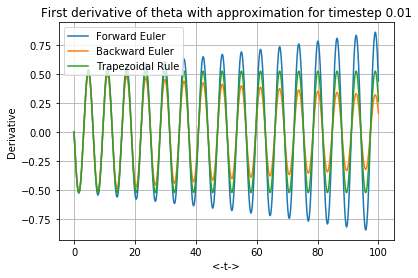

Theta 0.01


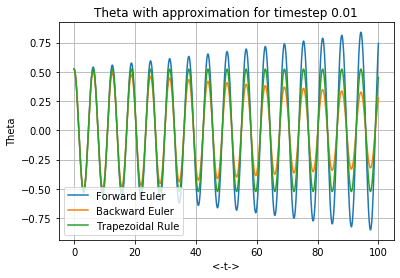

Derivative 0.02


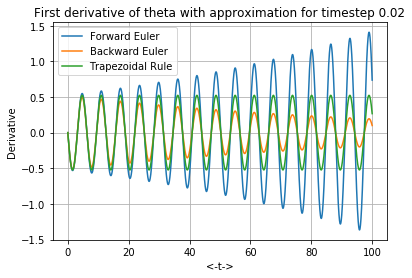

Theta 0.02


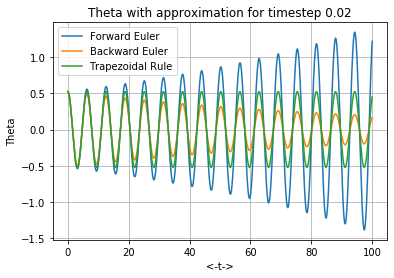

Derivative 0.05


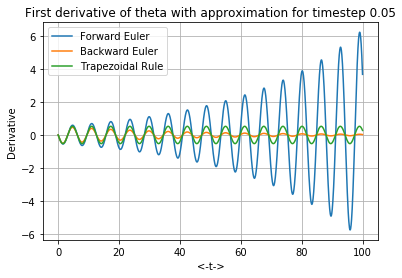

Theta 0.05


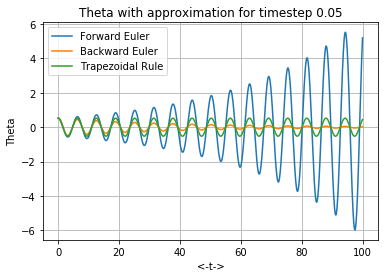

Derivative 0.1


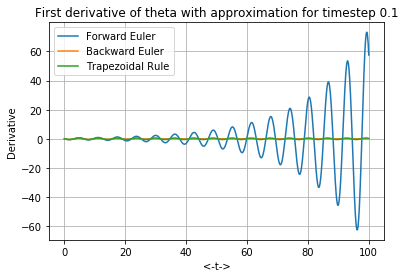

Theta 0.1


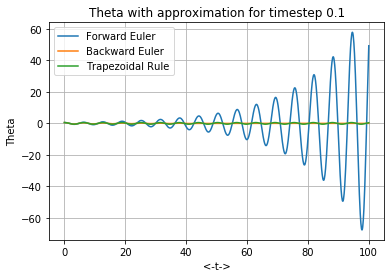

Derivative 0.2


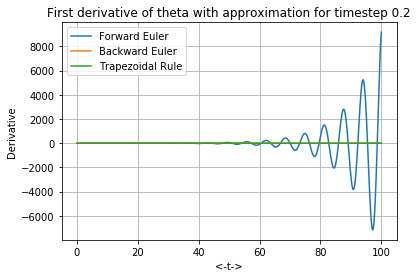

Theta 0.2


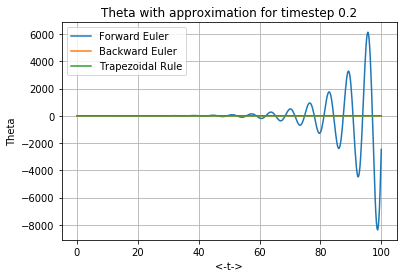

Derivative 0.5


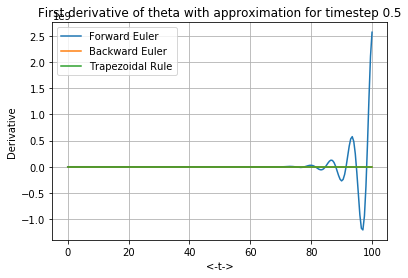

Theta 0.5


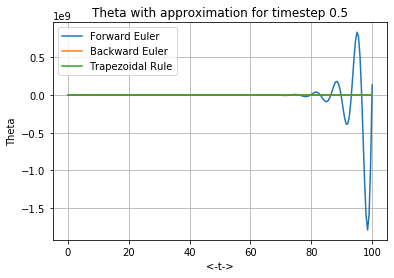

Derivative 1


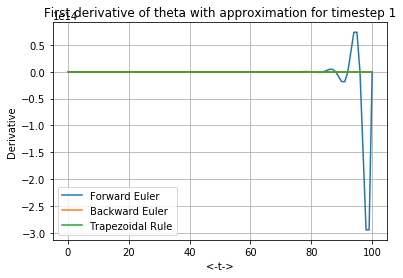

Theta 1


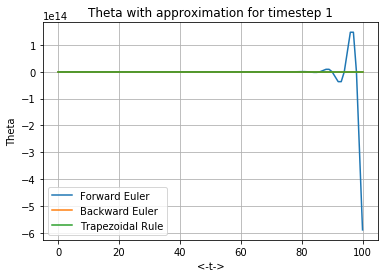

Derivative 2


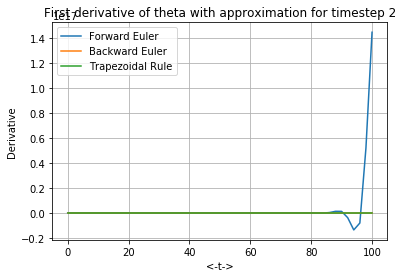

Theta 2


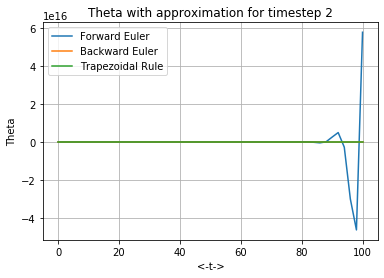

Derivative 5


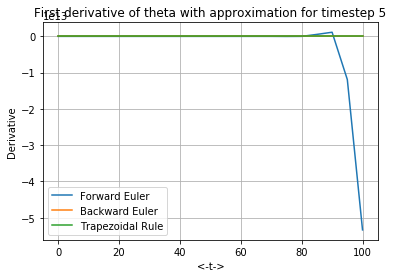

Theta 5


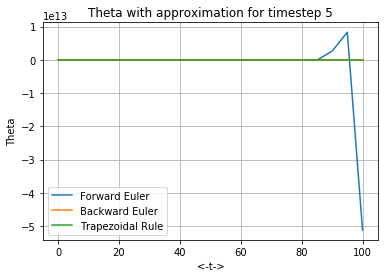

Derivative 10


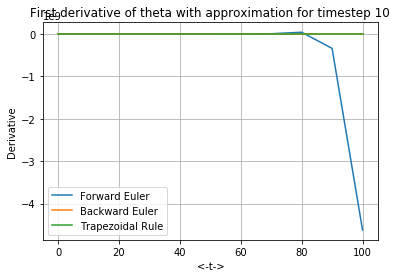

Theta 10


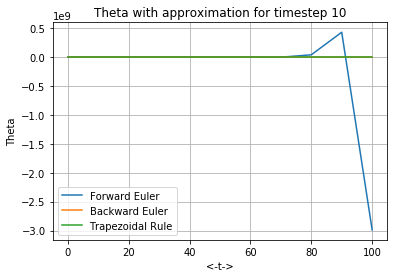

Derivative 20


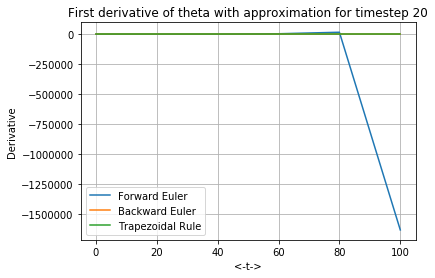

Theta 20


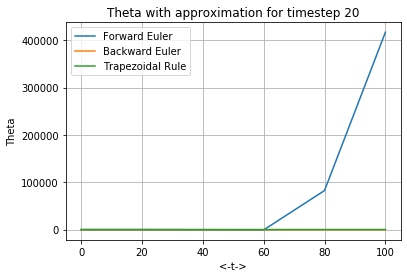

In [64]:
# with approximation of sinx = x

for dt in dts:
    
    N  = int(tf/dt) #no of time steps
    t  = np.zeros(N+1) #time stamps
    
    #solution vectors for theta

    theta_e = np.zeros(N+1)
    theta_i = np.zeros(N+1)
    theta_t = np.zeros(N+1)
    
    #solution vectors for theta_dash
    
    theta_dash_e = np.zeros(N+1)
    theta_dash_i = np.zeros(N+1)
    theta_dash_t = np.zeros(N+1)
    
    #including the initial conditions

    theta_e[0] = theta_init
    theta_i[0] = theta_init
    theta_t[0] = theta_init
    
    #no need to do this for derivative as they're already initialized with 0
    
    for i in range(1,N+1):
        
        #Euler Explicit 
        theta_dash_e[i] = theta_dash_e[i-1] - dt*(theta_e[i-1]) #derivative
        theta_e[i]      = theta_e[i-1] + dt*(theta_dash_e[i-1])           #theta
        
        #Euler Implicit
        theta_dash_i[i] = (theta_dash_i[i-1] - dt*(theta_i[i-1]))/(1+(dt**2))
        theta_i[i]      = (theta_i[i-1] + dt*(theta_dash_i[i]))
    
        #Trapezoidal Rule
        theta_dash_t[i] = ((1-(dt**2)/4)*theta_dash_t[i-1] - (dt)*(theta_t[i-1]))/(1 + (dt**2)/4)
        theta_t[i] = theta_t[i-1] + (dt/2)*(theta_dash_t[i]+theta_dash_t[i-1])
        
        t[i]       = t[i-1] + dt #updating the timestamp
        
    
    #plot the solutions obtained in separate plots

    print(f'Derivative {dt}')   
    plt.plot(t,theta_dash_e,label = 'Forward Euler')
    plt.plot(t,theta_dash_i,label = 'Backward Euler')
    plt.plot(t,theta_dash_t,label = 'Trapezoidal Rule')
    plt.grid()
    plt.legend()
    plt.xlabel('<-t->')
    plt.ylabel('Derivative')
    plt.title(f'First derivative of theta with approximation for timestep {dt}')
    #plt.tick_params(axis='x', colors='white')
    #plt.tick_params(axis='y', colors='white')
    plt.savefig(download_dir+'\\'+f'derivative_approx {dt}.png')
    plt.show()
    
    print(f'Theta {dt}')
    plt.plot(t,theta_e,label = 'Forward Euler')
    plt.plot(t,theta_i,label = 'Backward Euler')
    plt.plot(t,theta_t,label = 'Trapezoidal Rule')
    plt.grid()
    plt.legend()
    plt.xlabel('<-t->')
    plt.ylabel('Theta')
    plt.title(f'Theta with approximation for timestep {dt}')
    #plt.tick_params(axis='x', colors='white')
    #plt.tick_params(axis='y', colors='white')
    plt.savefig(download_dir+'\\'+f'Theta_approx {dt}.png')
    plt.show()
    
    
        